In [3]:
import networkx as nx

In [4]:
node_list = []

In [5]:
network = nx.Graph()

In [6]:
network.add_nodes_from(node_list)

In [8]:
# network.add_edge(1, 2, weight=0.5)

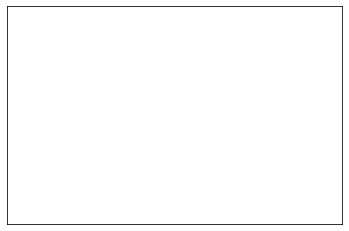

In [9]:
nx.draw_networkx(network, with_labels=True)